# Rendre les données de santé plus accessibles
L'agence Santé publique France souhaite rendre les données de santé publique plus accessibles, pour qu’elles soient utilisables par ses agents. 
Pour cela, nous faisons appel à vous pour réaliser une première exploration et visualisation des données, afin que nos agents puissent ensuite 
s’appuyer sur vos résultats.


> Ce notebook se concentre sur le nettoyage des données, le notebook **P3_01_notebook_EDA** est lui consacré à l'exploration des données. 
>
>Ce notebook va générer un nouveau jeu de données qui sera utilisé dans le notebook **P3_01_notebook_EDA**. 

# Nettoyage des données
## Chargement des bibliothèques

In [ ]:
data_dir = "../data/"

In [ ]:
# Ajout des bibliothèqued nécessaires si elle ne sont pas installées
#!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

## Chargement des données et bref aperçu

In [ ]:
data = pd.read_csv(data_dir + "fr.openfoodfacts.org.products.csv", sep='\t',low_memory=False)
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),nan,0.00000,[ bananas -> en:banan

## Données générales

In [ ]:
print(f"Nombre de lignes : {data.shape[0]}")
print(f"Nombre de colonnes : {data.shape[1]}")
print(f"Nombre de lignes dupliquées : {data.duplicated().sum()}")

Nombre de lignes : 320772
Nombre de colonnes : 162
Nombre de lignes dupliquées : 0


### Variable quantitatives
106 variables quantitatives

In [ ]:
print(f"Variables quantitatives : {len(data.select_dtypes([np.number]).columns)}")

Variables quantitatives : 106


In [ ]:
data.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
no_nutriments,0.00000,nan,nan,nan,nan,nan,nan,nan
additives_n,248939.00000,1.93602,2.50202,0.00000,0.00000,1.00000,3.00000,31.00000
ingredients_from_palm_oil_n,248939.00000,0.01966,0.14052,0.00000,0.00000,0.00000,0.00000,2.00000
ingredients_from_palm_oil,0.00000,nan,nan,nan,nan,nan,nan,nan
ingredients_that_may_be_from_palm_oil_n,248939.00000,0.05525,0.26921,0.00000,0.00000,0.00000,0.00000,6.00000
ingredients_that_may_be_from_palm_oil,0.00000,nan,nan,nan,nan,nan,nan,nan
nutrition_grade_uk,0.00000,nan,nan,nan,nan,nan,nan,nan
energy_100g,261113.00000,1141.91460,6447.15409,0.00000,377.00000,1100.00000,1674.00000,3251373.00000
energy-from-fat_100g,857.00000,585.50121,712.80994,0.00000,49.40000,300.00000,898.00000,3830.00000
fat_100g,243891.00000,12.73038,17.57875,0.00000,0.00000,5.00000,20.00000,714.29000


### Variable qualitatives

In [ ]:
print(f"Variables qualitatives : {len(data.select_dtypes('object').columns)}")

Variables qualitatives : 56


In [ ]:
data.describe(include=[object]).T

,count,unique,top,freq
code,320749,320749,0079471108034,1
url,320749,320749,http://world-fr.openfoodfacts.org/produit/3350...,1
creator,320770,3535,usda-ndb-import,169868
created_t,320769,189567,1489077120,20
created_datetime,320763,189568,2017-03-09T10:37:09Z,20
last_modified_t,320772,180495,1439141742,33
last_modified_datetime,320772,180495,2015-08-09T17:35:42Z,33
product_name,303010,221347,Ice Cream,410
generic_name,52795,38584,Pâtes alimentaires au blé dur de qualité supér...,201
quantity,104819,13826,500 g,4669


## Données dupliquées
On suppose que la variable **code** est unique car c'est l'index du produit. 
On va considérer une données comme dupliquée s'il existe plusieurs occurrences de cette valeur (code) dans le jeux de données. 
On ne garde que la dernière occurrence, en supposant que les données sont plus à jour. 

In [ ]:
print(f"Nombre de lignes dupliquées : {data[data.duplicated(subset='code', keep='last')].shape[0]}")

Nombre de lignes dupliquées : 22


In [ ]:
data.drop_duplicates(subset=['code'], keep='last', inplace=True)

In [ ]:
print(f"Nombre de lignes : {data.shape[0]}")

Nombre de lignes : 320750


## Données manquantes
De nombreuses données sont manquantes et l'on va procéder aux actions suivantes : 
 - Suppression des variables qui ont plus de 50% de valeurs manquantes 
 - Suppression les lignes dont la variable "code" est vide
 - Suppression des lignes dont la variable "product_name" est vide
 - Suppression des lignes dont "nutrition_grade_fr" est vide
 - Remplacement par la valeur la plus fréquente pour la variable "brands" pour les marques manquantes
 - Remplacement par la valeur 0 pour les les nutriments qui ont une valeur manquante
 - Suppression des variables non nécessaires pour l'analyse

In [ ]:
def show_missing_values():
    plt.figure(figsize=(20,10))
    heatmap = sns.heatmap(data.isna(), cbar=False)
    heatmap.set_title("Valeurs manquantes")
    heatmap.set_xlabel("Nom des variables")
    heatmap.set_ylabel("Lignes")
    plt.show()

In [ ]:
print(f"Nombre de valeurs manquantes : {data.isna().sum().sum()}")
missing = data.isna().sum().sum()
values = data.shape[0] * data.shape[1]
missing_percent = (missing / values) * 100
print(f"Pourcentage de valeurs manquantes : {missing_percent:.2f}%")

Nombre de valeurs manquantes : 39605807
Pourcentage de valeurs manquantes : 76.22%


In [ ]:
#show_missing_values()

### Suppression des variables qui ont plus de 50%

In [ ]:
threshold = 0.5

# Valeurs manquantes
missing_percentage  = data.isnull().sum()/data.shape[0]
columns_to_delete = missing_percentage[missing_percentage > threshold]
display(columns_to_delete)

# Suppression des colonnes
data = data.drop(columns_to_delete.index.to_list(), axis=1)

generic_name                                 0.83547
quantity                                     0.67326
packaging                                    0.75383
packaging_tags                               0.75382
categories                                   0.73690
categories_tags                              0.73690
categories_fr                                0.73690
origins                                      0.93088
origins_tags                                 0.93100
manufacturing_places                         0.88627
manufacturing_places_tags                    0.88629
labels                                       0.85484
labels_tags                                  0.85458
labels_fr                                    0.85458
emb_codes                                    0.90863
emb_codes_tags                               0.90865
first_packaging_code_geo                     0.94138
cities                                       1.00000
cities_tags                                  0

### Suppression les lignes dont la variable "code" est vide

In [ ]:
print(f"{data[data['code'].isnull()].shape[0]} ligne(s) avec la variable 'code' vide")
data = data[data['code'].notnull()]

1 ligne(s) avec la variable 'code' vide


### Suppression des lignes dont la variable "product_name" est vide

In [ ]:
print(f"{data[data['product_name'].isnull()].shape[0]} ligne(s) avec la variable 'product_name' vide")
data = data[data['product_name'].notnull()]

17762 ligne(s) avec la variable 'product_name' vide


### Suppression des lignes dont "nutrition_grade_fr" est vide

In [ ]:
data = data[data['nutrition_grade_fr'].notnull()]

### Remplacement par la valeur la plus fréquente pour la variable "brands"

In [ ]:
data['brands'] = data['brands'].fillna(data['brands'].mode()[0])

### Tous les nutriments qui ont une valeur manquante sont remplacés par le chiffre 0

In [ ]:
df_selection = data.filter(regex='^(?!nutrition-score).*(_100g)$')
nutrients = df_selection.columns.to_list()
nutrients

['energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

In [ ]:
data[nutrients] = data[nutrients].fillna(value=0)

### Suppression des variables non nécessaires pour l'analyse

In [ ]:
col_to_delete = np.array(["url",
                          "creator",
                          "created_t",
                          "created_datetime",
                          "last_modified_t",
                          "last_modified_datetime",
                          "brands_tags",
                          "countries",
                          "countries_tags",
                          "countries_fr",
                          "ingredients_text"
                         ])
data = data.drop(col_to_delete, axis=1)

In [ ]:
data.shape

(218463, 23)

## Valeurs aberrantes

Les nutriments qui entrent dans le calcul des portions pour 100g :
 - Matière grasse/Lipide (fat_100g)
 - Glucide (carbohydrates_100g)
 - Fibre alimentaire (fiber_100g)
 - Proteine (protein_100g
 - Sel (salt_100g)
 
 - Les observations dont le total pour les nutriments de base est supérieur à 100g sont supprimées. 
 - Les observations dont le total pour les nutriments de base est égal à 0 sont supprimées. 
 - Les lignes contenant des valeurs négatives pour les nutriments sont supprimées
 

In [ ]:
base_nutrients = np.array(['fat_100g','carbohydrates_100g','fiber_100g', 'proteins_100g','salt_100g'])

### Les observations dont le total pour les nutriments de base est supérieur à 100g sont supprimées. 

In [ ]:
data['check_100g'] = data[base_nutrients].sum(axis=1)
data = data[data["check_100g"] <= 100]
data = data.drop(columns="check_100g", axis=1)

### Les observations dont le total pour les nutriments de base est égal à 0 sont supprimées. 

In [ ]:
data['check_0g'] = data[nutrients].sum(axis=1)
data = data[data["check_0g"] != 0]
data = data.drop(columns="check_0g", axis=1)

### Les lignes contenant des valeurs négatives pour les nutriments sont supprimées

In [ ]:
# Les lignes contenant des valeurs négatives pour les nutriments sont supprimées
df = data[nutrients] >= 0

# On ajoute une colonne avec le nombre de variables qui sont supérieures ou égale 0
data['neg_100g'] = df.sum(axis=1)

# On ne garde que les lignes qui ont 5 nutriments égal à 0
max = len(nutrients)
data = data[data["neg_100g"] == max]
data = data.drop(columns="neg_100g", axis=1)

### Énergie

<AxesSubplot:>

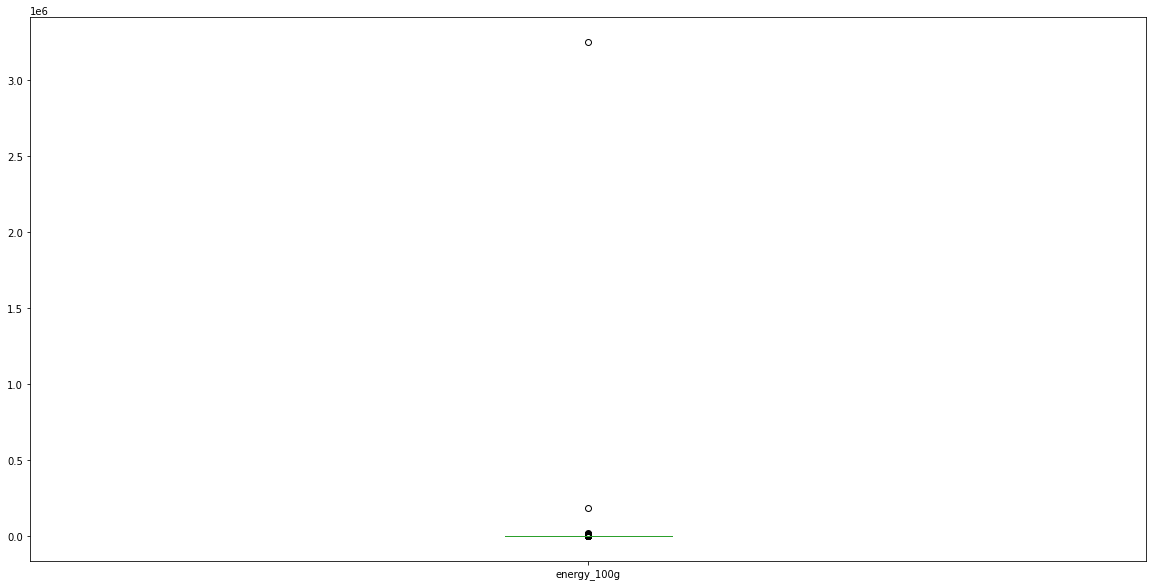

In [ ]:
data['energy_100g'].plot.box(figsize=(20,10))

In [ ]:
# Suppression des ligne ayant plus de 3769 energy_100g
data = data[data['energy_100g'] <= 3766]

<AxesSubplot:>

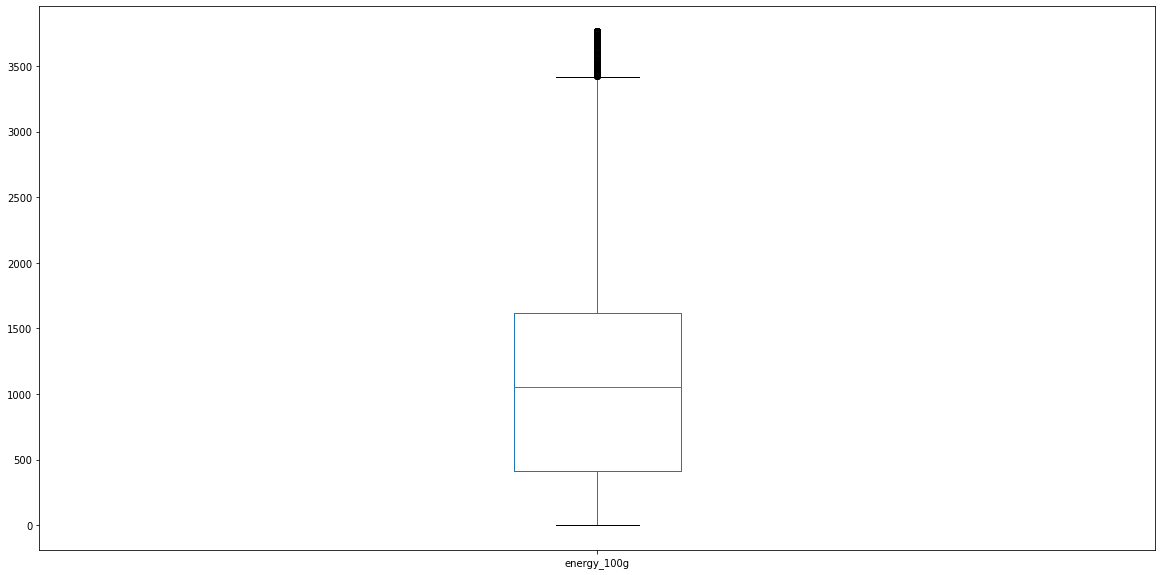

In [ ]:
data['energy_100g'].plot.box(figsize=(20,10))

## Résumé
Le nombre de colonnes a été réduit de 162 à 34 et le nombre de lignes de 320772 à 196863.
**61%** des observations ont été conservées.

In [ ]:
print(f"Nombre de lignes : {data.shape[0]}")
print(f"Nombre de colonnes : {data.shape[1]}")

Nombre de lignes : 196856
Nombre de colonnes : 23


## Sauvegarde du nouveau jeau de données

In [ ]:
data.to_csv(data_dir + "fr.openfoodfacts_clean.csv",index=False)